# Regression Diagnostics

## 1. Loading data

In [1]:
# Table 1.9 New Work Rivers Data

dat <- read.csv("newwork_river.csv",header=T)
head(dat)
dim(dat)

River,Agr,Forest,Rsdntial,ComIndl,Nitrogen
Olean,26,63,1.2,0.29,1.10
Cassadaga,29,57,0.7,0.09,1.01
Oatka,54,26,1.8,0.58,1.90
Neversink,2,84,1.9,1.98,1.00
Hackensack,3,27,29.4,3.11,1.99
Wappinger,19,61,3.4,0.56,1.42


[1] 20  6

In [2]:
# changing colnames
colnames(dat) <- c("River", "X1", "X2", "X3", "X4", "Y")
head(dat)

River,X1,X2,X3,X4,Y
Olean,26,63,1.2,0.29,1.10
Cassadaga,29,57,0.7,0.09,1.01
Oatka,54,26,1.8,0.58,1.90
Neversink,2,84,1.9,1.98,1.00
Hackensack,3,27,29.4,3.11,1.99
Wappinger,19,61,3.4,0.56,1.42


In [5]:
# redesign data-set
re.dat <- cbind(1:20,dat[,c(1,6,2:5)])
colnames(re.dat)[1] <- "Row"
head(re.dat)
tail(re.dat)

Row,River,Y,X1,X2,X3,X4
1,Olean,1.10,26,63,1.2,0.29
2,Cassadaga,1.01,29,57,0.7,0.09
3,Oatka,1.90,54,26,1.8,0.58
4,Neversink,1.00,2,84,1.9,1.98
5,Hackensack,1.99,3,27,29.4,3.11
6,Wappinger,1.42,19,61,3.4,0.56


,Row,River,Y,X1,X2,X3,X4
15,15,Ausable,0.76,2,89,0.7,0.35
16,16,Black,0.87,6,82,0.5,0.15
17,17,Schoharie,0.80,22,70,0.9,0.22
18,18,Raquette,0.87,4,75,0.4,0.18
19,19,Oswegatchie,0.66,21,56,0.5,0.13
20,20,Cohocton,1.25,40,49,1.1,0.13


## 2-1. Multiple Linear Regression (107page)

Y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + ε

In [7]:
# linear model fit
attach(re.dat)
res_lm <- lm(Y ~ X1 + X2 + X3 + X4)
summary(res_lm)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49404 -0.13180  0.01951  0.08287  0.70480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.722214   1.234082   1.396   0.1832  
X1           0.005809   0.015034   0.386   0.7046  
X2          -0.012968   0.013931  -0.931   0.3667  
X3          -0.007227   0.033830  -0.214   0.8337  
X4           0.305028   0.163817   1.862   0.0823 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2649 on 15 degrees of freedom
Multiple R-squared:  0.7094,	Adjusted R-squared:  0.6319 
F-statistic: 9.154 on 4 and 15 DF,  p-value: 0.0005963


In [8]:
summary(res_lm)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.722213529,1.23408166,1.3955426,0.18316946
X1,0.005809126,0.01503396,0.3864001,0.70462624
X2,-0.012967887,0.01393148,-0.9308336,0.36667966
X3,-0.007226768,0.03383005,-0.2136198,0.83372002
X4,0.305027765,0.16381667,1.8620069,0.08230952


In [10]:
round(summary(res_lm)$coefficient[,3],2) # t-value

(Intercept)          X1          X2          X3          X4 
       1.40        0.39       -0.93       -0.21        1.86

In [18]:
# 1. observations deleted

re.dat.del.4 <- re.dat[-4,]
re.dat.del.5 <- re.dat[-5,]

In [20]:
## 2.using filter func. in dplyr package

library(dplyr)
re.dat.del.4 <- re.dat %>% filter(Row != 4)
re.dat.del.5 <- re.dat %>% filter(Row != 5)

In [21]:
res_lm.del.4 <- lm(Y ~ X1 + X2 + X3 + X4, data = re.dat.del.4)
res_lm.del.5 <- lm(Y ~ X1 + X2 + X3 + X4, data = re.dat.del.5)

In [22]:
summary(res_lm.del.4)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = re.dat.del.4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36421 -0.11154  0.00406  0.12059  0.26538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.099471   0.911636   1.206 0.247788    
X1           0.010137   0.010984   0.923 0.371705    
X2          -0.007589   0.010222  -0.742 0.470098    
X3          -0.123793   0.039337  -3.147 0.007134 ** 
X4           1.528956   0.343719   4.448 0.000551 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1925 on 14 degrees of freedom
Multiple R-squared:  0.8557,	Adjusted R-squared:  0.8145 
F-statistic: 20.76 on 4 and 14 DF,  p-value: 9.087e-06


In [23]:
round(summary(res_lm.del.4)$coefficient[,3],2)

(Intercept)          X1          X2          X3          X4 
       1.21        0.92       -0.74       -3.15        4.45

In [24]:
summary(res_lm.del.5)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = re.dat.del.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40124 -0.09184  0.02912  0.10840  0.22493 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.626014   0.781091   2.082  0.05620 . 
X1           0.002352   0.009539   0.247  0.80881   
X2          -0.012760   0.008815  -1.448  0.16976   
X3           0.181161   0.044390   4.081  0.00112 **
X4           0.075618   0.113957   0.664  0.51775   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1676 on 14 degrees of freedom
Multiple R-squared:  0.864,	Adjusted R-squared:  0.8252 
F-statistic: 22.24 on 4 and 14 DF,  p-value: 6.055e-06


In [25]:
round(summary(res_lm.del.5)$coefficient[,3],2)

(Intercept)          X1          X2          X3          X4 
       2.08        0.25       -1.45        4.08        0.66

In [27]:
# Table 4.2 New York Rivers Data: The t-tests for the individual coefficients(107 page)

table4.2 <- data.frame(None = round(summary(res_lm)$coefficient[,3],2),
    Neversink = round(summary(res_lm.del.4)$coefficient[,3],2),
    Hackensack = round(summary(res_lm.del.5)$coefficient[,3],2))

table4.2

,None,Neversink,Hackensack
(Intercept),1.40,1.21,2.08
X1,0.39,0.92,0.25
X2,-0.93,-0.74,-1.45
X3,-0.21,-3.15,4.08
X4,1.86,4.45,0.66


t-value 비교를 통해서 모델 선택? -> res_lm.del.4 모델 단순회귀 

## 2-2. Multiple Linear Regression (109-111 pages)

Y = β0 + β4X4 + ε

### Scatter plot of Y vs. X4 (3가지)

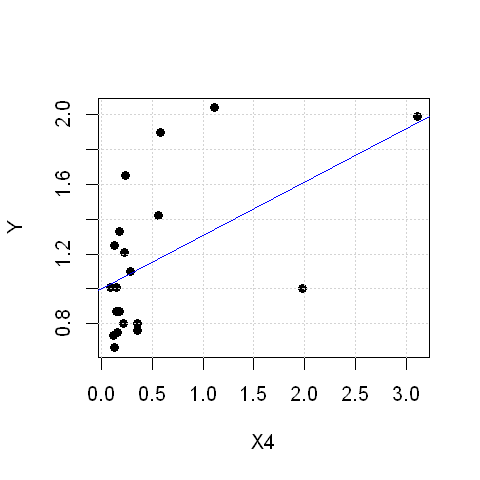

In [28]:
# plot size
options(repr.plot.width = 4, repr.plot.height = 4)

# scatter plot
plot(X4, Y, pch = 19)
grid()

## add fitted line
reg1 <- lm(Y ~ X4)
abline(reg1, col = "blue")

x4의 scatter plot과 선형회귀를 그려봄

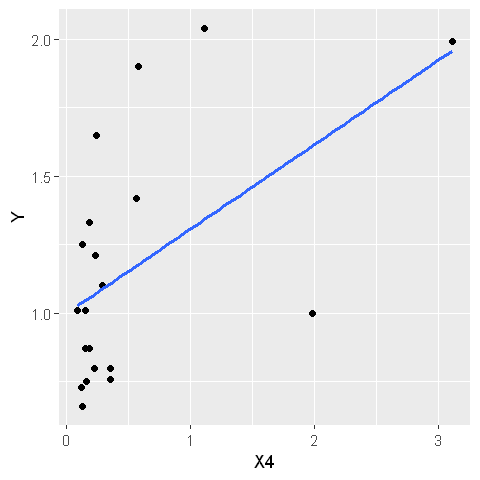

In [30]:
library(ggplot2)
ggplot(re.dat, aes(x = X4, y = Y)) + geom_point() +
    geom_smooth(method = lm, se = F)

package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kmr14\AppData\Local\Temp\RtmpeelC4B\downloaded_packages


Warning message:
"package 'ggrepel' was built under R version 3.6.3"

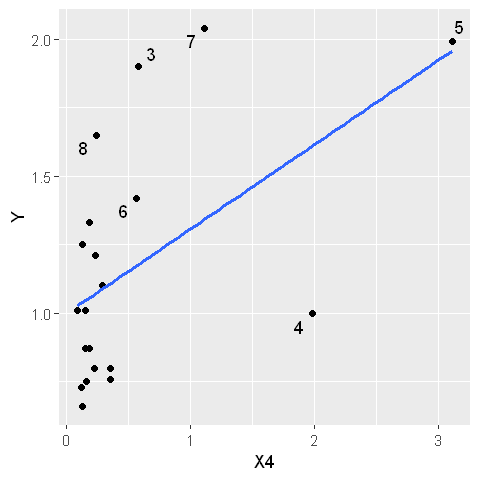

In [34]:
# Install ggrepel package if needed
# install.packages("devtools")
# devtools::install_github("slowkow/ggrepel")
install.packages("ggrepel")
library(ggrepel)

ggplot(re.dat, aes(x = X4, y = Y)) + geom_point() +
    geom_smooth(method = lm, se = F) +
    geom_text_repel(data=filter(re.dat, Row >=3 & Row <=8), aes(label=Row))

In [35]:
#Predict y
round(fitted(reg1),2)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1.09 1.03 1.18 1.61 1.96 1.17 1.34 1.07 1.04 1.07 1.05 1.05 1.04 1.11 1.11 1.04 
  17   18   19   20 
1.07 1.05 1.04 1.04

In [36]:
#Residual
round(residuals(reg1),2)

1     2     3     4     5     6     7     8     9    10    11    12    13 
 0.01 -0.02  0.72 -0.61  0.03  0.25  0.70  0.58 -0.03  0.14  0.28 -0.30 -0.31 
   14    15    16    17    18    19    20 
-0.31 -0.35 -0.17 -0.27 -0.18 -0.38  0.21

In [37]:
#Standardized Residuals
round(rstandard(reg1),2)

1     2     3     4     5     6     7     8     9    10    11    12    13 
 0.03 -0.05  1.95 -1.85  0.16  0.67  1.92  1.57 -0.10  0.38  0.75 -0.81 -0.83 
   14    15    16    17    18    19    20 
-0.83 -0.94 -0.48 -0.72 -0.50 -1.03  0.57

In [38]:
#Leverage Values
round(hatvalues(reg1),2)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.05 0.07 0.05 0.25 0.67 0.05 0.08 0.06 0.06 0.06 0.06 0.06 0.06 0.05 0.05 0.06 
  17   18   19   20 
0.06 0.06 0.06 0.06

- An outlier is a data point whose response y does not follow the general trend of the rest of the data.
- A data point has high leverage if it has "extreme" predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values (e.g., with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor).

In [39]:
# Table 4.3 New York Rivers Data (110 page)

table4.3 <- data.frame(row = Row,
    r_i = round(rstandard(reg1),2),
    p_ii = round(hatvalues(reg1),2))

table4.3

row,r_i,p_ii
1,0.03,0.05
2,-0.05,0.07
3,1.95,0.05
4,-1.85,0.25
5,0.16,0.67
6,0.67,0.05
7,1.92,0.08
8,1.57,0.06
9,-0.10,0.06
10,0.38,0.06


### Figure 4.6 Index plots of the standardized residuals and the leverage values (111 page)

In [40]:
res.dat <- cbind(re.dat, rstandard(reg1), hatvalues(reg1))
colnames(res.dat )[c(8,9)] <- c("r_i","p_ii")

In [41]:
p1 <- ggplot(res.dat, aes(x = Row, y = r_i)) + geom_point()
p2 <- ggplot(res.dat, aes(x = Row, y = p_ii)) + geom_point()

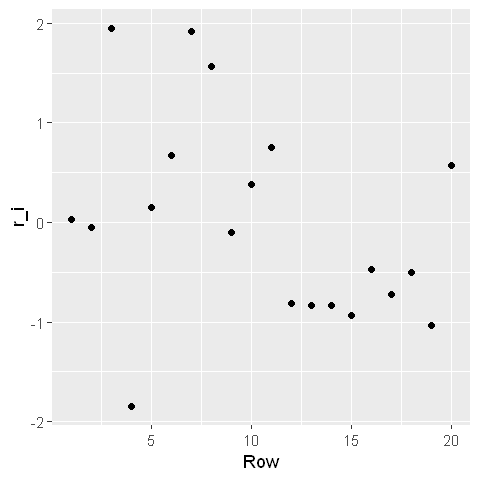

In [42]:
p1

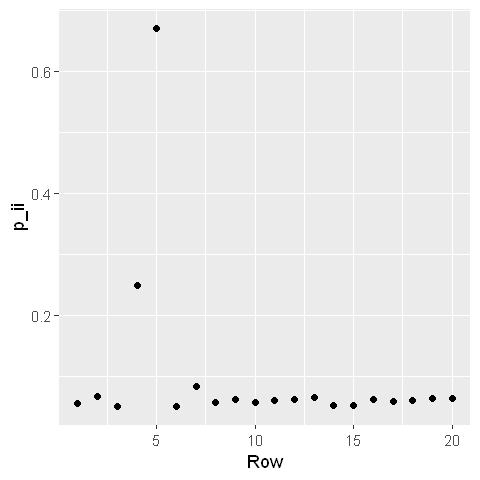

In [43]:
p2

Warning message:
"package 'gridExtra' is in use and will not be installed"

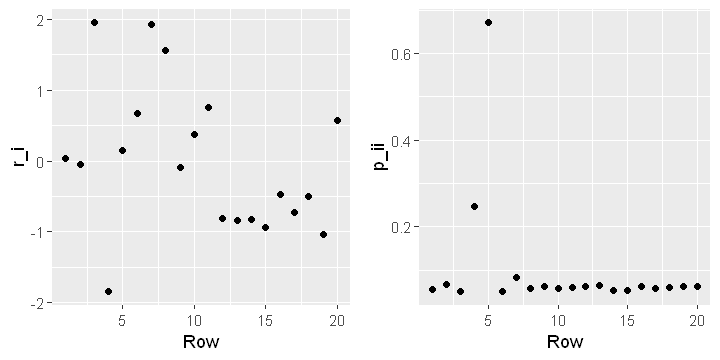

In [47]:
install.packages("gridExtra")
library(gridExtra)

# plot size
options(repr.plot.width = 6, repr.plot.height = 3)
grid.arrange(p1, p2, nrow = 1)

In [49]:
# Cook’s distance: C
round(cooks.distance(reg1),2)

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.00 0.00 0.10 0.56 0.02 0.01 0.17 0.07 0.00 0.00 0.02 0.02 0.02 0.02 0.02 0.01 
  17   18   19   20 
0.02 0.01 0.04 0.01

In [50]:
# Welsch and Kuh Measures: DFITS
round(dffits(reg1),2)

1     2     3     4     5     6     7     8     9    10    11    12    13 
 0.01 -0.01  0.49 -1.14  0.22  0.15  0.63  0.40 -0.02  0.09  0.19 -0.21 -0.22 
   14    15    16    17    18    19    20 
-0.19 -0.22 -0.12 -0.18 -0.12 -0.27  0.15

In [53]:
#Hadi’s Influence Measures: H
## https://olsrr.rsquaredacademy.com/articles/influence_measures.html
install.packages("olsrr")
library(olsrr)
round(ols_hadi(reg1)$hadi,2)

Warning message:
"package 'olsrr' is in use and will not be installed"

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.06 0.07 0.58 0.77 2.04 0.10 0.60 0.37 0.07 0.08 0.13 0.14 0.15 0.13 0.16 0.09 
  17   18   19   20 
0.12 0.09 0.19 0.11

In [54]:
# Table 4.4 New York Rivers Data (114 page)

table4.4 <- data.frame(row = Row,
    C_i = round(cooks.distance(reg1),2),
    DFITs_i = round(dffits(reg1),2),
    H_i = round(ols_hadi(reg1)$hadi,2))

table4.4

row,C_i,DFITs_i,H_i
1,0.00,0.01,0.06
2,0.00,-0.01,0.07
3,0.10,0.49,0.58
4,0.56,-1.14,0.77
5,0.02,0.22,2.04
6,0.01,0.15,0.10
7,0.17,0.63,0.60
8,0.07,0.40,0.37
9,0.00,-0.02,0.07
10,0.00,0.09,0.08


### Figure 4.7 Index plots of influence measures (114 page)

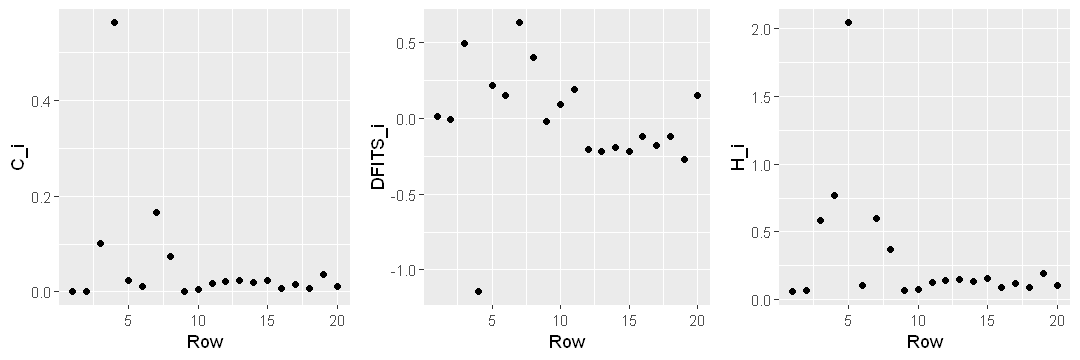

In [55]:
res.influence.dat <- cbind(re.dat, cooks.distance(reg1), dffits(reg1),ols_hadi(reg1)$hadi)
colnames(res.influence.dat)[c(8,9,10)] <- c("C_i", "DFITS_i", "H_i")

p1 <- ggplot(res.influence.dat, aes(x = Row, y = C_i)) + geom_point()
p2 <- ggplot(res.influence.dat, aes(x = Row, y = DFITS_i)) + geom_point()
p3 <- ggplot(res.influence.dat, aes(x = Row, y = H_i)) + geom_point()

options(repr.plot.width = 9, repr.plot.height = 3)
grid.arrange(p1, p2, p3, nrow = 1)

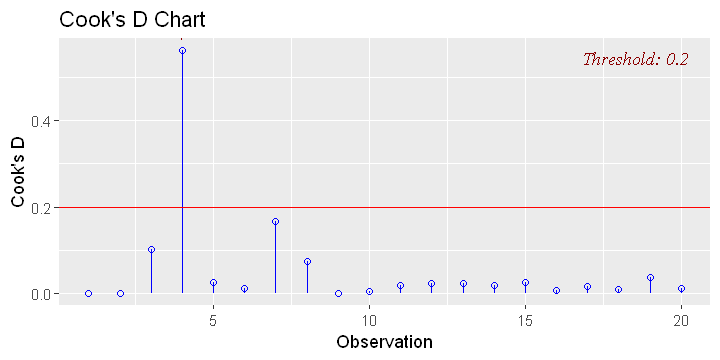

In [56]:
# Cook's Distance plot by using olss package

# plot size
options(repr.plot.width = 6, repr.plot.height = 3)

ols_plot_cooksd_chart(reg1)

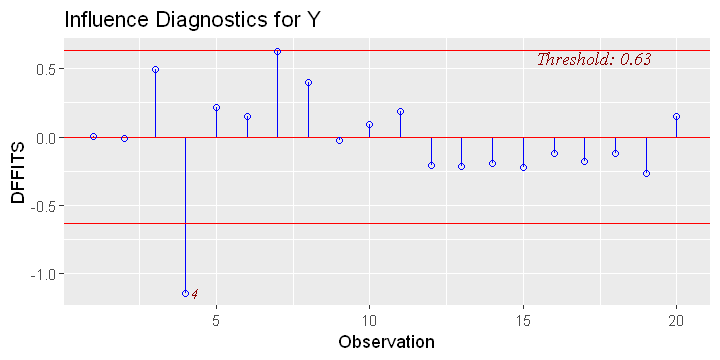

In [57]:
# Welsch and Kuh measure plot by using olss package
ols_plot_dffits(reg1)

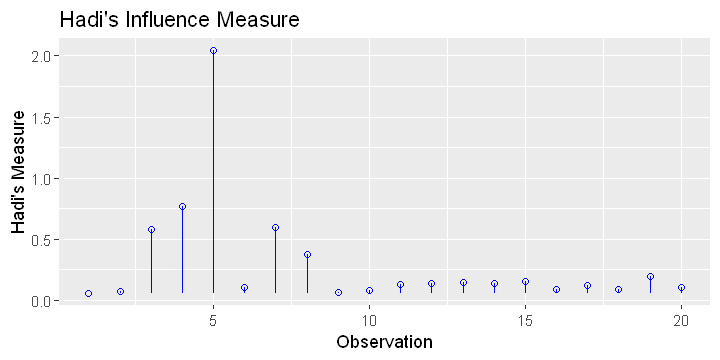

In [58]:
# Hadi's measure plot by using olss package
ols_plot_hadi(reg1)